In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
os.chdir("/Users/tanmay/Desktop/CMU/Fall 20/Database Management/HW1")
os.getcwd()

'/Users/tanmay/Desktop/CMU/Fall 20/Database Management/HW1'

In [5]:
L_x = 30
L_y = 15

In [6]:
rawData = np.loadtxt('SeismicResponse.txt')

In [7]:
rawData

array([[-0.2642976 , -0.22762377,  0.36427861, ...,  0.18111662,
         0.66791795,  0.60401195],
       [ 0.56      ,  0.0932    ,  0.642     , ..., -0.662     ,
        -0.0862    , -0.093     ],
       [-0.91      , -0.579     , -0.152     , ...,  0.971     ,
        -0.696     ,  0.316     ],
       ...,
       [ 0.34878458,  0.10145552, -0.16634834, ..., -0.81948049,
        -0.23347039,  0.88934951],
       [-0.22820496, -0.31020626,  0.06554218, ...,  0.28106302,
        -0.70929412, -0.31433216],
       [-0.50458302,  0.65440137, -0.66631474, ..., -0.13824269,
        -0.37489374, -1.2111999 ]])

In [8]:
#To check the dimension of the input array
np.shape(rawData)

(5000, 8)

In [9]:
time = np.arange(0,50,0.01)
numRecords = len(time)

In [10]:
time = time.reshape(numRecords,1)

In [11]:
clearData = np.concatenate((time,rawData),axis=1)

In [36]:

for k in clearData[0:10]:
    print (k)


[ 0.         -0.2642976  -0.22762377  0.36427861 -0.09605207  0.35494525
  0.18111662  0.66791795  0.60401195]
[ 0.01    0.56    0.0932  0.642   0.0692  0.217  -0.662  -0.0862 -0.093 ]
[ 0.02  -0.91  -0.579 -0.152 -0.81   0.365  0.971 -0.696  0.316]
[ 0.03   0.853 -1.24  -0.712  0.791  0.298  0.764  0.327 -0.64 ]
[ 0.04   0.75   0.307  0.677  0.285 -0.577  0.775 -1.1   -1.02 ]
[ 0.05    0.0598  0.577   0.431  -0.372  -0.652  -0.684  -0.129  -0.268 ]
[ 0.06   0.101  1.56  -0.418  1.06  -0.103  0.636 -0.599  1.26 ]
[ 0.07    1.47   -0.046   0.27   -0.0966  0.132   0.0576  0.754   0.199 ]
[ 0.08   -0.378   0.455  -0.245  -0.13    1.36    0.0974 -0.144   2.25  ]
[ 0.09  -0.376  0.124  0.136  0.573  0.361  0.123 -0.681 -0.386]


In [12]:
theta_b = np.empty([0,0])
a_bx = np.empty([0,0])
for i in range(0,numRecords):
    val_diff = clearData[i,5]-clearData[i,6]
    val = clearData[i,7]-(val_diff/L_x)*(L_y/2)
    theta_b=np.append(theta_b,val_diff/L_x)
    a_bx=np.append(a_bx,val)

In [13]:
len(theta_b)

5000

In [14]:
theta_b

array([ 0.00579429,  0.0293    , -0.0202    , ...,  0.02918883,
        0.01580869,  0.02010568])

In [15]:
len(a_bx)

5000

In [16]:
a_bx

array([ 0.62446079, -0.30595   , -0.5445    , ..., -0.45238664,
       -0.82785927, -0.52568635])

In [40]:
clearData[1800]

array([ 18.        ,  -4.5678695 ,   4.82309921, -10.66284851,
         2.52376163,   6.92835578,  19.18245689, -16.45413061,
         4.1045631 ])

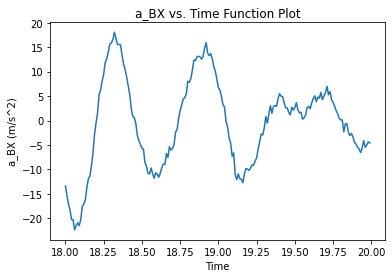

In [43]:
plt.plot(time[1800:2000],a_bx[1800:2000]) 
  
# naming the x axis 
plt.xlabel('Time') 
# naming the y axis 
plt.ylabel('a_BX (m/s^2)') 
  
# giving a title to my graph 
plt.title('a_BX vs. Time Function Plot') 
  
# function to show the plot 
plt.show() 

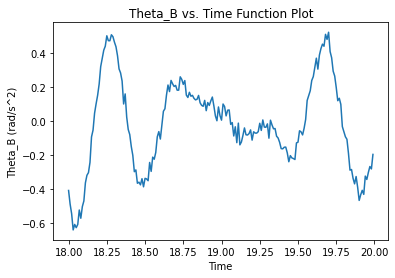

In [44]:
plt.plot(time[1800:2000],theta_b[1800:2000]) 
  
# naming the x axis 
plt.xlabel('Time') 
# naming the y axis 
plt.ylabel('Theta_B (rad/s^2)') 
  
# giving a title to my graph 
plt.title('Theta_B vs. Time Function Plot') 
  
# function to show the plot 
plt.show() 

In [18]:
#Part B
print(np.max(abs(a_bx)))
print(np.argmax(abs(a_bx)))

22.361121636249997
1806


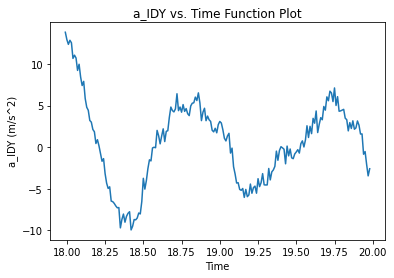

13.8072427565
1799


In [47]:
#Part C
a_idy = np.empty([0,0])
for i in range(0,numRecords):
    val_sum_a = clearData[i,1]+clearData[i,2]
    val_sum_b = clearData[i,5]+clearData[i,6]
    diff = val_sum_b - val_sum_a
    a_idy=np.append(a_idy,diff/2)
    
plt.plot(time[1799:1999],a_idy[1799:1999]) 
  
# naming the x axis 
plt.xlabel('Time') 
# naming the y axis 
plt.ylabel('a_IDY (m/s^2)') 
  
# giving a title to my graph 
plt.title('a_IDY vs. Time Function Plot') 
  
# function to show the plot 
plt.show() 

print(np.max(abs(a_idy)))
print(np.argmax(abs(a_idy)))

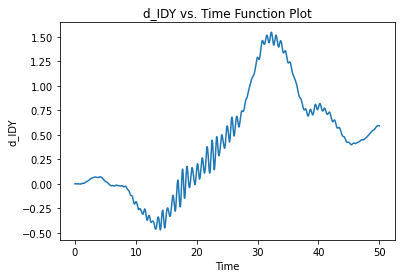

1.5468464282531948
3226


In [48]:
#Part D
v_idy = np.zeros([numRecords,1])
for i in range(0,numRecords):
    if i == 0:
        v_idy[i] = a_idy[i]*0.01
    else:    
        v_idy[i] = v_idy[i-1] + a_idy[i]*0.01
    
d_idy = np.zeros([numRecords,1])
for i in range(0,numRecords):
    if i == 0:
        d_idy[i] = v_idy[i]*0.01
    else:    
        d_idy[i] = d_idy[i-1] + v_idy[i]*0.01
        
plt.plot(time,d_idy) 
  
# naming the x axis 
plt.xlabel('Time') 
# naming the y axis 
plt.ylabel('d_IDY') 
  
# giving a title to my graph 
plt.title('d_IDY vs. Time Function Plot') 
  
# function to show the plot 
plt.show() 

print(np.max(abs(d_idy)))
print(np.argmax(abs(d_idy)))

In [21]:
d_idy

array([[5.13991621e-05],
       [4.78883242e-05],
       [1.85627486e-04],
       ...,
       [5.90704964e-01],
       [5.90494611e-01],
       [5.90293101e-01]])

In [131]:
# Part E
a1_noise = clearData[0:501,1]
l = len(a1_noise)
mean_a1_noise = np.average(a1_noise)
print('Mean',mean_a1_noise)
sum_var = 0
for p in a1_noise:
    t = (p-mean_a1_noise)**2
    sum_var = sum_var + t

std_a1_noise = sum_var/(l-1)
print('std',np.sqrt(std_a1_noise))
##

a2_noise = clearData[0:501,2]
l = len(a2_noise)
mean_a2_noise = np.average(a2_noise)
print('Mean',mean_a2_noise)
sum_var = 0
for p in a2_noise:
    t = (p-mean_a2_noise)**2
    sum_var = sum_var + t

std_a2_noise = sum_var/(l-1)
print('std',np.sqrt(std_a2_noise))
##

a3_noise = clearData[0:501,5]
l = len(a3_noise)
mean_a3_noise = np.average(a3_noise)
print('Mean',mean_a3_noise)
sum_var = 0
for p in a3_noise:
    t = (p-mean_a3_noise)**2
    sum_var = sum_var + t

std_a3_noise = sum_var/(l-1)
print('std',np.sqrt(std_a3_noise))
##

a4_noise = clearData[0:501,6]
l = len(a4_noise)
mean_a4_noise = np.average(a4_noise)
print('Mean',mean_a4_noise)
sum_var = 0
for p in a4_noise:
    t = (p-mean_a4_noise)**2
    sum_var = sum_var + t

std_a4_noise = sum_var/(l-1)
print('std',np.sqrt(std_a4_noise))


Mean 0.005170039473053893
std 0.611561143106918
Mean 0.04582232656287426
std 0.5860868461247511
Mean 0.025758036748503
std 0.6262339857241771
Mean 0.010014439842315379
std 0.6405593395527751


In [134]:
# Part F
std_noise_aidy = np.std(a_idy[0:500])
print(std_noise_aidy)

sig = np.sqrt(0.25*std_a1_noise+0.25*std_a2_noise+0.25*std_a3_noise+0.25*std_a4_noise)
print(sig)

0.613857174989584
0.6164393918551471


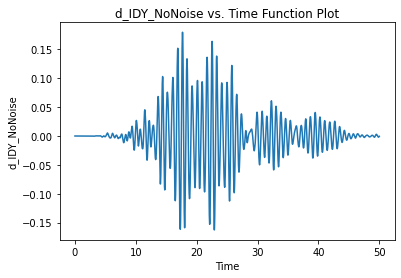

0.17968887954060714
1767


In [136]:
# Part G
rawData_NoNoise = np.loadtxt('SeismicResponse_noNoise.txt')
clearData_NoNoise = np.concatenate((time,rawData_NoNoise),axis=1)
numRecords_NoNoise = len(clearData_NoNoise)

a_idy_NoNoise = np.empty([0,0])
for i in range(0,numRecords_NoNoise):
    val_sum_a_NN = clearData_NoNoise[i,1]+clearData_NoNoise[i,2]
    val_sum_b_NN = clearData_NoNoise[i,5]+clearData_NoNoise[i,6]
    diff_NN = val_sum_b_NN - val_sum_a_NN
    a_idy_NoNoise=np.append(a_idy_NoNoise,diff_NN/2)
    
v_idy_NoNoise = np.zeros([numRecords_NoNoise,1])
for i in range(0,numRecords_NoNoise):
    if i == 0:
        v_idy_NoNoise[i] = a_idy_NoNoise[i]*0.01
    else:    
        v_idy_NoNoise[i] = v_idy_NoNoise[i-1] + a_idy_NoNoise[i]*0.01
    
d_idy_NoNoise = np.zeros([numRecords_NoNoise,1])
for i in range(0,numRecords_NoNoise):
    if i == 0:
        d_idy_NoNoise[i] = d_idy_NoNoise[i]*0.01
    else:    
        d_idy_NoNoise[i] = d_idy_NoNoise[i-1] + v_idy_NoNoise[i]*0.01
        
plt.plot(time,d_idy_NoNoise)

# naming the x axis 
plt.xlabel('Time') 
# naming the y axis 
plt.ylabel('d_IDY_NoNoise') 
  
# giving a title to my graph 
plt.title('d_IDY_NoNoise vs. Time Function Plot') 
  
# function to show the plot 
plt.show() 

print(np.max(abs(d_idy_NoNoise)))
print(np.argmax(abs(d_idy_NoNoise)))

In [141]:
# Part H
a_by = np.empty([0,0])
a_ay = np.empty([0,0])
for i in range(0,numRecords):
    val_sum_a = clearData[i,1]+clearData[i,2]
    val_sum_b = clearData[i,5]+clearData[i,6]
    a_by=np.append(a_by,val_sum_b/2)
    a_ay=np.append(a_ay,val_sum_a/2)
    
a_max = max(abs(a_ay))
b_max = max(abs(a_by))
diff_max = b_max-a_max
print(a_max,b_max)
print('Max_Diff_Max',diff_max)
print('Max_a_idy',np.max(abs(a_idy)))


7.6114879615 16.92932496
Max_Diff_Max 9.317836998499999
Max_a_idy 13.8072427565
